In [1]:
import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "VAL"
CONFIG_FILE = "./config/rf_2.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

239it [00:00, 3138.00it/s]
  0%|          | 0/239 [00:00<?, ?it/s]

centering images


100%|██████████| 239/239 [00:02<00:00, 91.69it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(239, 160, 160)
(239, 15)


47
[[ 77.          33.          66.36842105]
 [ 35.         127.          30.05263158]]
[2218. 4234.]
0 [77.         33.         66.36842105]


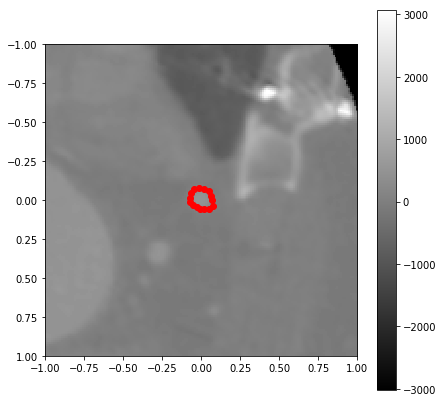

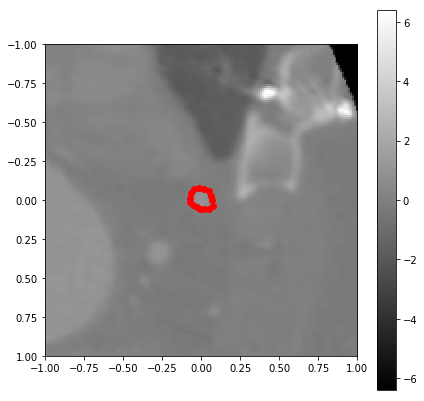

In [11]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

i = np.random.randint(N)
print(i)
x = X[i]
#x = filters.gaussian(x, sigma=3)
#x = filters.sobel(x)
#x = filters.sobel(x)

xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

blobs = feature.blob_doh(xnorm, max_sigma=70, num_sigma=20)

coords = blobs[:,:2]
dist   = np.sum( (coords-np.array([80,80]))**2, axis=1 )
print(blobs)
print(dist)
index = np.argmin(dist)

print(index, blobs[index])



c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(7,7))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

In [16]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

for i in range(5000):
    x = X[i]

    xnorm  = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

    xnorm_ = (1.0*x-x[mid,mid])/(np.std(x)+1e-5)
    c = C[i]

    c = vessel_regression.pred_to_contour(c)

    if np.amax(np.abs(c)) < 1:
        continue
    
    print(i)
    plt.figure(figsize=(7,7))
    plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
    plt.colorbar()
    plt.scatter(c[:,0],c[:,1],color='r')
    plt.show()